In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,16))

<Figure size 1500x1600 with 0 Axes>

<Figure size 1500x1600 with 0 Axes>

# EDA (Exploratory Data Analysis)

In [271]:
df = pd.read_csv("OECD_Salary_USD.csv")

In [272]:
df.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,MEASURE,Measure,UNIT_MEASURE,Unit of measure,...,OBS_VALUE,Observation value,BASE_PER,Base period,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.SAE:DSD_EARNINGS@AV_AN_WAGE(1.0),Average annual wages,I,AUS,Australia,WG,Wages,USD_PPP,"US dollars, PPP converted",...,52346.674,NaN,2022,NaN,A,Normal value,0,Units,0,Zero
1,DATAFLOW,OECD.ELS.SAE:DSD_EARNINGS@AV_AN_WAGE(1.0),Average annual wages,I,AUS,Australia,WG,Wages,USD_PPP,"US dollars, PPP converted",...,52501.772,NaN,2022,NaN,A,Normal value,0,Units,0,Zero
2,DATAFLOW,OECD.ELS.SAE:DSD_EARNINGS@AV_AN_WAGE(1.0),Average annual wages,I,AUS,Australia,WG,Wages,USD_PPP,"US dollars, PPP converted",...,53021.326,NaN,2022,NaN,A,Normal value,0,Units,0,Zero
3,DATAFLOW,OECD.ELS.SAE:DSD_EARNINGS@AV_AN_WAGE(1.0),Average annual wages,I,AUS,Australia,WG,Wages,USD_PPP,"US dollars, PPP converted",...,46966.869,NaN,2022,NaN,A,Normal value,0,Units,0,Zero
4,DATAFLOW,OECD.ELS.SAE:DSD_EARNINGS@AV_AN_WAGE(1.0),Average annual wages,I,AUS,Australia,WG,Wages,USD_PPP,"US dollars, PPP converted",...,47406.184,NaN,2022,NaN,A,Normal value,0,Units,0,Zero


In [273]:
df1 = df.query('TIME_PERIOD == 2022')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 31 to 1202
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STRUCTURE              39 non-null     object 
 1   STRUCTURE_ID           39 non-null     object 
 2   STRUCTURE_NAME         39 non-null     object 
 3   ACTION                 39 non-null     object 
 4   REF_AREA               39 non-null     object 
 5   Reference area         39 non-null     object 
 6   MEASURE                39 non-null     object 
 7   Measure                39 non-null     object 
 8   UNIT_MEASURE           39 non-null     object 
 9   Unit of measure        39 non-null     object 
 10  PAY_PERIOD             39 non-null     object 
 11  Pay period             39 non-null     object 
 12  PRICE_BASE             39 non-null     object 
 13  Price base             39 non-null     object 
 14  AGGREGATION_OPERATION  39 non-null     object 
 15  Aggregatio

In [274]:
df2 = df1[['Reference area','OBS_VALUE','BASE_PER']]

In [275]:
num_cols = df2.select_dtypes(include=np.number).columns.tolist()

In [276]:
print("Numerical Variables:")
print(num_cols)

Numerical Variables:
['OBS_VALUE', 'BASE_PER']


OBS_VALUE
Skew : 0.17


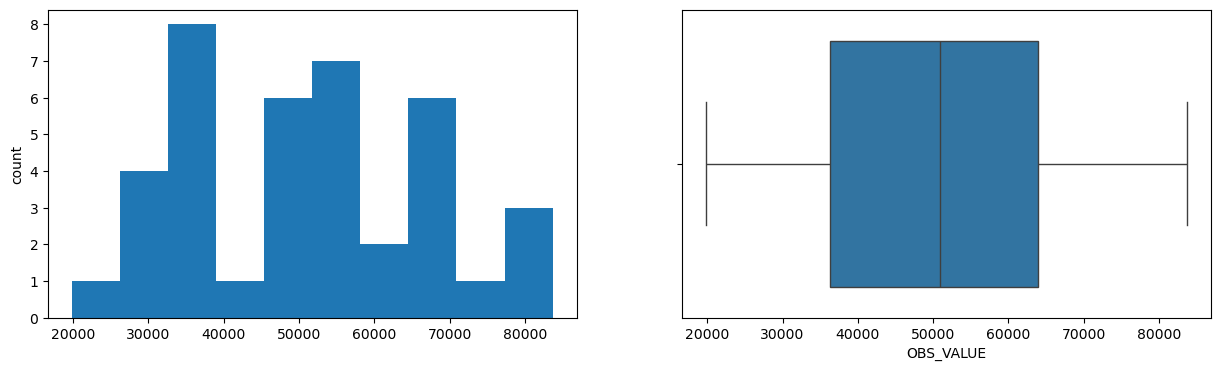

BASE_PER
Skew : 0.0


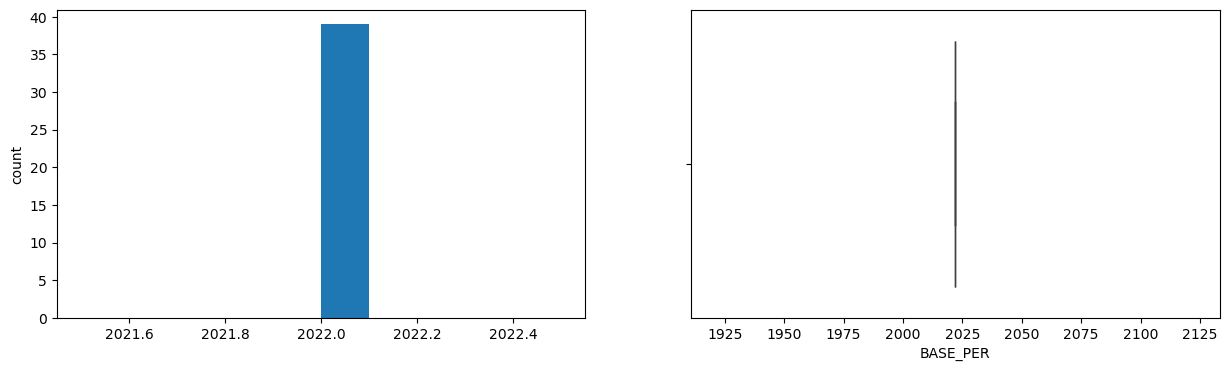

In [277]:
for col in num_cols:
    print(col)
    print('Skew :', round(df2[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df2[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df1[col])
    plt.show()

Here I just did a univariate analysis to see the skew of the difference in salaries

In [279]:
df2 = df2[['OBS_VALUE']]
df2.describe() 

,OBS_VALUE
count,39.000000
mean,51125.558385
std,16567.470673
min,19869.750000
25%,36246.437000
50%,50927.816000
75%,63911.467500
max,83661.253000


# Data Visualisation

In [281]:
df3 = df1[['Reference area','OBS_VALUE']]

In [282]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 31 to 1202
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Reference area  39 non-null     object 
 1   OBS_VALUE       39 non-null     float64
dtypes: float64(1), object(1)
memory usage: 936.0+ bytes


In [283]:
df3.sort_values(by=['OBS_VALUE'], inplace=True)

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3677551188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.sort_values(by=['OBS_VALUE'], inplace=True)


In [284]:
df3.head()

,Reference area,OBS_VALUE
767,Mexico,19869.750
159,Colombia,26289.901
408,Greece,28598.901
951,Slovak Republic,29908.547
436,Hungary,30476.190


C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3561698956.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = 'Reference area',x = 'OBS_VALUE',data = df3 ,palette = "Blues")


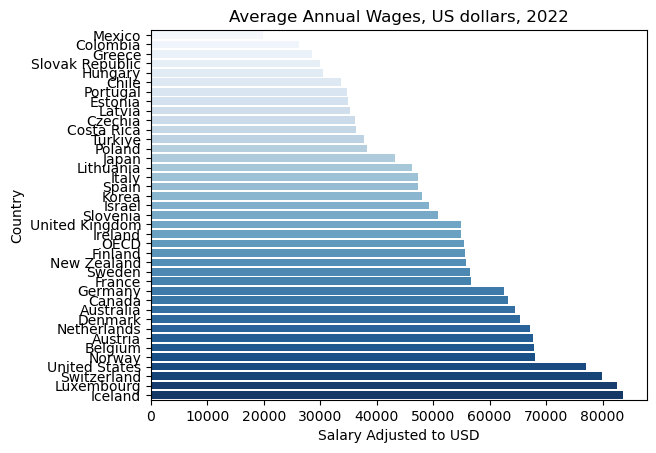

In [303]:
sns.barplot(y = 'Reference area',x = 'OBS_VALUE',data = df3 ,palette = "Blues")
#Adding the aesthetics
plt.title('Average Annual Wages, US dollars, 2022')
plt.xlabel('Salary Adjusted to USD')
plt.ylabel('Country') 
# Show the plot
plt.show()